<a href="https://colab.research.google.com/github/feliavila/Trabajos/blob/main/Qu%C3%ADmicaBioorg%C3%A1nica_TP5_C%C3%A1lculo_de_constante_de_asociaci%C3%B3n_de_ciclodextrina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

#Concentraciones de las soluciones madre
CDmadre = 12
epsilon=30

#Dataframe del primer procedimiento
df = pd.DataFrame({"CD agregada":np.linspace(0,0.06,7)})
df["Volumen Final"]= df["CD agregada"] + 3
df["Concentración CD"]= CDmadre * df["CD agregada"]/df["Volumen Final"]
df["Absorbancias"]= [0.532,0.300,0.182,0.144,0.112,0.090,0.079]         #introducir las absorbancias
df["Concentración F"]=df.iloc[0]["Absorbancias"]/epsilon * 3/ df["Volumen Final"]
df["F libre"]= df["Absorbancias"]/epsilon
df["CD complejo"]= df["Concentración F"] - df["F libre"]
df["CD libre"]= df["Concentración CD"]-df["CD complejo"]
df["F inicial / F"]= df.iloc[0]["F libre"]/df["F libre"]

print(df)



   CD agregada  Volumen Final  Concentración CD  Absorbancias  \
0         0.00           3.00          0.000000         0.532   
1         0.01           3.01          0.039867         0.300   
2         0.02           3.02          0.079470         0.182   
3         0.03           3.03          0.118812         0.144   
4         0.04           3.04          0.157895         0.112   
5         0.05           3.05          0.196721         0.090   
6         0.06           3.06          0.235294         0.079   

   Concentración F   F libre  CD complejo  CD libre  F inicial / F  
0         0.017733  0.017733     0.000000  0.000000       1.000000  
1         0.017674  0.010000     0.007674  0.032193       1.773333  
2         0.017616  0.006067     0.011549  0.067921       2.923077  
3         0.017558  0.004800     0.012758  0.106054       3.694444  
4         0.017500  0.003733     0.013767  0.144128       4.750000  
5         0.017443  0.003000     0.014443  0.182279       5.91111

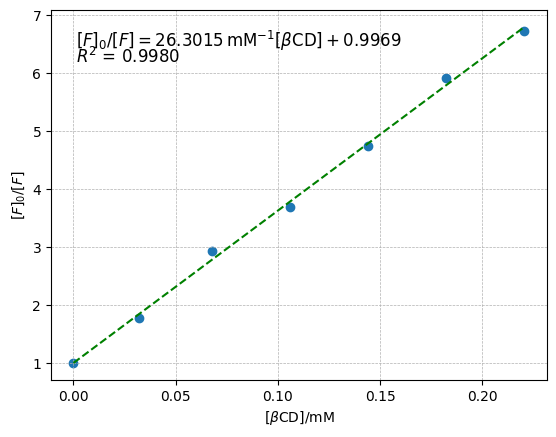

In [ ]:
#Regresión lineal
x=df["CD libre"]
y=df["F inicial / F"]
coef=np.polyfit(x,y,1)
y_pred=coef[0]*x+coef[1]
y_mean = np.mean(y)
SS_total = np.sum((y - y_mean) ** 2)
SS_residual = np.sum((y - y_pred) ** 2)
R2 = 1 - (SS_residual / SS_total)

#Gráfico
plt.scatter(x,y)
plt.plot(x,y_pred,color="green",linestyle="--")
plt.xlabel("[$\\beta$CD]/mM")
plt.ylabel("$[F]_0 / [F]$")
plt.text(0.05, 0.95, f'$[F]_0 / [F]  = {coef[0]:.4f} \\, \\mathrm{{mM}}^{{-1}} [\\beta \\mathrm{{CD}}] + {coef[1]:.4f}$',
         transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')
plt.text(0.05, 0.90, f'$R^2$ = {R2:.4f}',
         transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')
plt.grid(True,linestyle='--', linewidth=0.5)
plt.show()